In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
COLUMNS = [
    'char_offset', 
    'annotated_name', 
    'yago2_id', 
    'wikipedia_url', 
    'document_id'
]

# --- Load the Datasets ---
dev_df = pd.read_csv('./AIDA-EE/apw_eng_201010.tsv', sep='\t', names=COLUMNS)
test_df = pd.read_csv('./AIDA-EE/apw_eng_201011.tsv', sep='\t', names=COLUMNS)

# Combine into a single DataFrame
df = pd.concat([dev_df, test_df], ignore_index=True)

print(f"Total Mentions/Annotations: {len(df)}")
df.head()

Total Mentions/Annotations: 9976


,char_offset,annotated_name,yago2_id,wikipedia_url,document_id
0,5668,Congo,Democratic_Republic_of_the_Congo,http://en.wikipedia.org/wiki/Democratic_Republ...,APW_ENG_20101001.0002
1,5776,United Nations,United_Nations,http://en.wikipedia.org/wiki/United_Nations,APW_ENG_20101001.0002
2,5875,Congo,Democratic_Republic_of_the_Congo,http://en.wikipedia.org/wiki/Democratic_Republ...,APW_ENG_20101001.0002
3,5939,Rwanda,Rwanda,http://en.wikipedia.org/wiki/Rwanda,APW_ENG_20101001.0002
4,6010,Rwanda,Rwanda,http://en.wikipedia.org/wiki/Rwanda,APW_ENG_20101001.0002


Total mentions: 9976
Mentions with Emerging Entities (EE / --OOKBE--): 573
Percentage of Emerging Entities: 5.74%


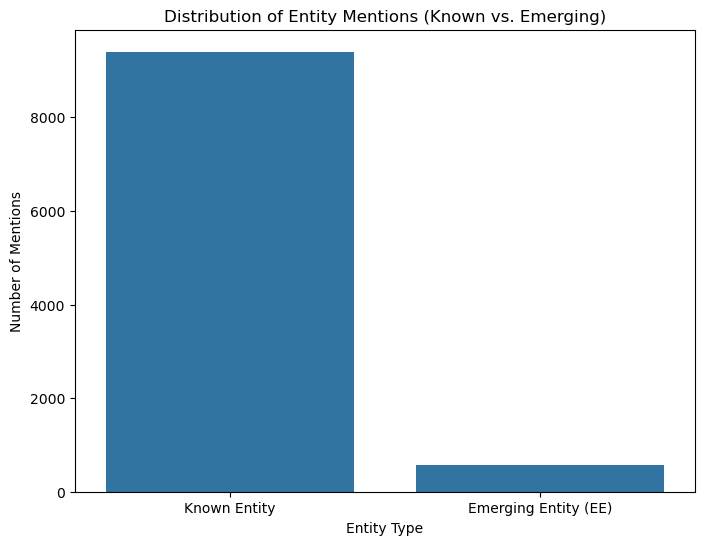

In [8]:
OOKBE_TAG = '--OOKBE--'
df['is_emerging_entity'] = df['yago2_id'] == OOKBE_TAG

total_mentions = len(df)
ee_mentions = df['is_emerging_entity'].sum()
known_mentions = total_mentions - ee_mentions
ee_percentage = (ee_mentions / total_mentions) * 100

print(f"Total mentions: {total_mentions}")
print(f"Mentions with Emerging Entities (EE / --OOKBE--): {ee_mentions}")
print(f"Percentage of Emerging Entities: {ee_percentage:.2f}%")

plt.figure(figsize=(8, 6))
sns.countplot(x='is_emerging_entity', data=df)
plt.title('Distribution of Entity Mentions (Known vs. Emerging)')
plt.xlabel('Entity Type')
plt.ylabel('Number of Mentions')
plt.xticks([0, 1], ['Known Entity', 'Emerging Entity (EE)'])
plt.show()

Number of unique documents: 298

Average Mentions per Article: 33.48
Min Mentions in a Document: 1
Max Mentions in a Document: 242


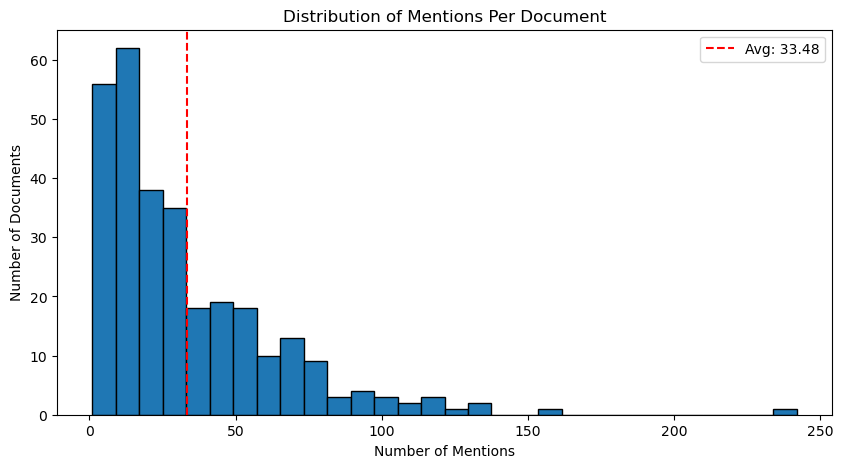

In [10]:
num_documents = df['document_id'].nunique()
print(f"Number of unique documents: {num_documents}")

mentions_per_doc = df.groupby('document_id').size()
avg_mentions = mentions_per_doc.mean()

print(f"\nAverage Mentions per Article: {avg_mentions:.2f}")
print(f"Min Mentions in a Document: {mentions_per_doc.min()}")
print(f"Max Mentions in a Document: {mentions_per_doc.max()}")

plt.figure(figsize=(10, 5))
mentions_per_doc.plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Mentions Per Document')
plt.xlabel('Number of Mentions')
plt.ylabel('Number of Documents')
plt.axvline(avg_mentions, color='r', linestyle='--', label=f'Avg: {avg_mentions:.2f}')
plt.legend()
plt.show()

Annotated Name Length Statistics (in characters):


count    9976.000000
mean        8.583099
std         4.233405
min         2.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        42.000000
Name: name_length, dtype: float64

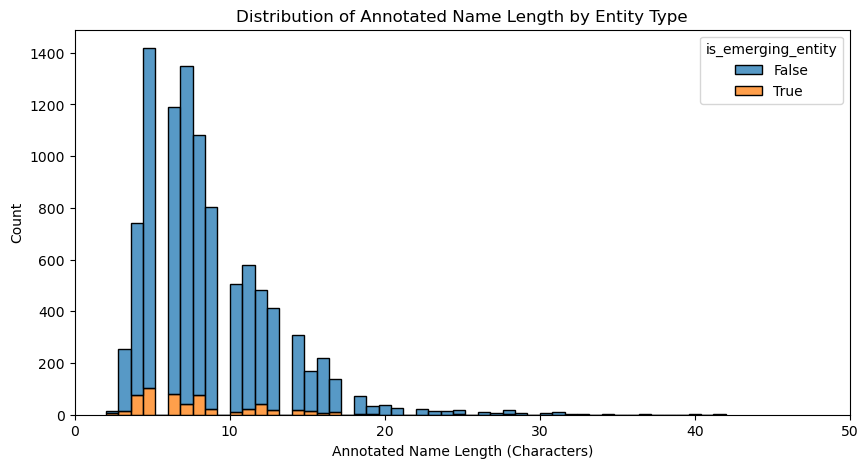

In [11]:
df['name_length'] = df['annotated_name'].apply(len)

print("Annotated Name Length Statistics (in characters):")
display(df['name_length'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df, x='name_length', hue='is_emerging_entity', multiple="stack", bins=50)
plt.title('Distribution of Annotated Name Length by Entity Type')
plt.xlabel('Annotated Name Length (Characters)')
plt.ylabel('Count')
plt.xlim(0, 50) # Focus on the most common lengths
plt.show()

In [12]:
print("Top 10 Most Frequent Annotated Names:")
display(df['annotated_name'].value_counts().head(10).to_frame(name='Frequency'))

print("\nTop 10 Document IDs with the most annotations (i.e., most entity-dense articles):")
display(df['document_id'].value_counts().head(10).to_frame(name='Frequency'))

Top 10 Most Frequent Annotated Names:


,Frequency
annotated_name,
U.S.,216
China,146
Japan,104
Correa,88
Obama,86
Afghanistan,84
Pakistan,79
Chinese,76
NATO,66



Top 10 Document IDs with the most annotations (i.e., most entity-dense articles):


,Frequency
document_id,
APW_ENG_20101001.0011,242
APW_ENG_20101001.0090,154
APW_ENG_20101001.0122,135
APW_ENG_20101001.0091,130
APW_ENG_20101001.0141,122
APW_ENG_20101001.0196,116
APW_ENG_20101101.0088,114
APW_ENG_20101101.0053,114
APW_ENG_20101001.0167,112
